In [7]:
def my_int( s ):
    num = 0
    for ch in s:
        num = num*10 + ord(ch) - ord('0')
                        # 52      48
    return num

# 1234 => 1*1000 + 2*100 + 3*10 + 4*1
s = "1234"   # "1" => 49 - "0" -> 1
my_int(s) + 1

1235

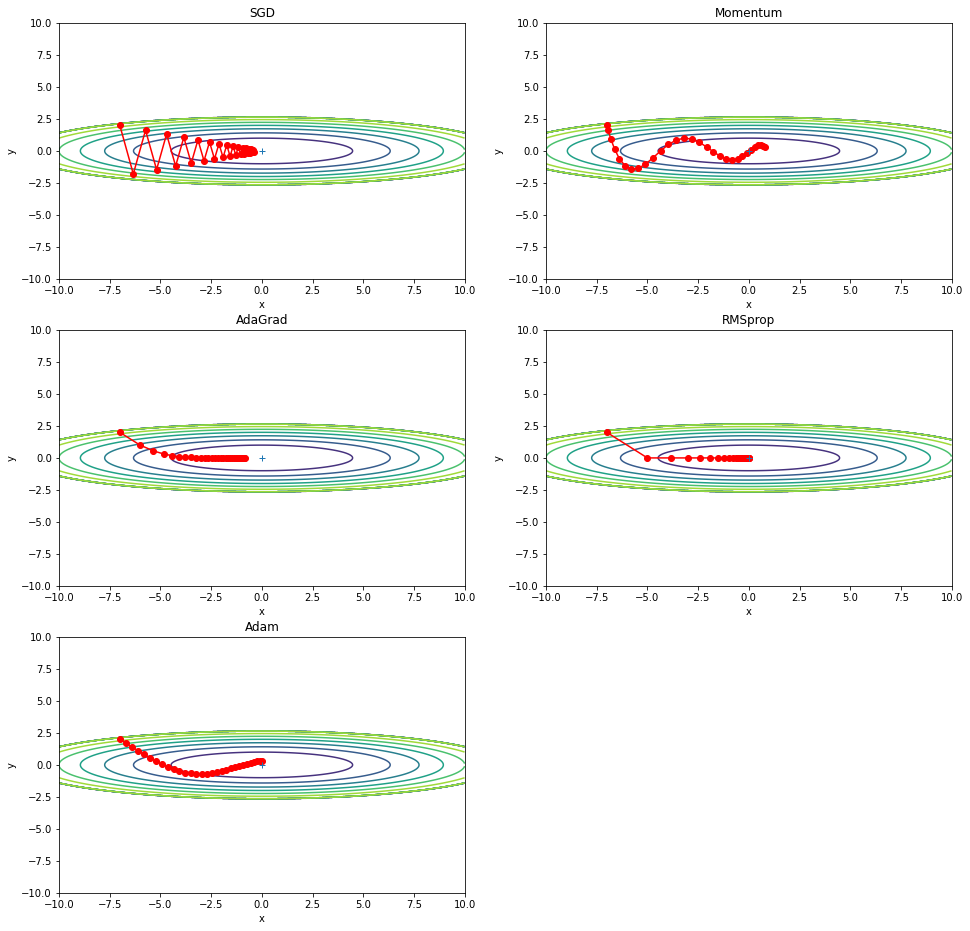

In [13]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2

# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (2.0, 2.0)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.0)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.4089095678099577
Momentum:2.3637967922205174
AdaGrad:2.123015723659165
Adam:2.181453691298252
===========iteration:100===========
SGD:1.5809241148400508
Momentum:0.315639325196724
AdaGrad:0.11376790742738241
Adam:0.15513196585543546
===========iteration:200===========
SGD:0.6990812532481294
Momentum:0.2956200703854072
AdaGrad:0.1110255265935328
Adam:0.22823889671610192
===========iteration:300===========
SGD:0.5045655461712786
Momentum:0.1654759398946839
AdaGrad:0.06632719810967758
Adam:0.11743010657312812
===========iteration:400===========
SGD:0.42384201521625275
Momentum:0.1384468940830354
AdaGrad:0.1035746891520406
Adam:0.1172237214992342
===========iteration:500===========
SGD:0.29314384526597453
Momentum:0.15115454977533038
AdaGrad:0.04019065794012429
Adam:0.09972137215118843
===========iteration:600===========
SGD:0.3336650302692841
Momentum:0.12991104186865804
AdaGrad:0.053929222646544636
Adam:0.10586413965075087
===========iteration:700=

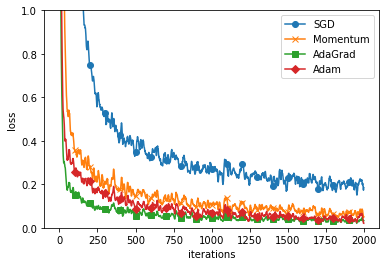

In [14]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [17]:
import numpy as np
a = np.random.randn(10000)
print(a)
print(np.mean(a))
print(np.std(a))

[-0.22161196  0.56094225  2.09127971 ... -1.53941624 -1.11913816
  0.62679953]
0.005374573809136668
1.002989095942525


In [22]:
import numpy as np
a = np.random.randn(1000,1000)*0.01
print(np.mean(a))
print(np.std(a))

1.4768808099450552e-05
0.009992211734416343


In [6]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

-0.12255470795130897
0.5628085098647063


(1000, 100)


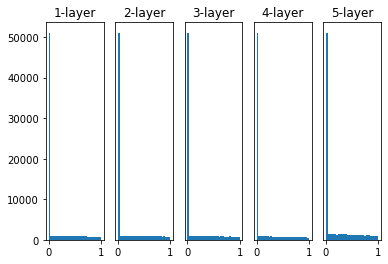

In [31]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#         w = np.zeros((node_num, node_num))   
    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3024796466028072
Xavier:2.302255018998374
He:2.4061126793463163
===========iteration:100===========
std=0.01:2.302626020161055
Xavier:2.2295075812543534
He:1.4806874939943273
===========iteration:200===========
std=0.01:2.3020005047021996
Xavier:2.0465962027600555
He:0.8434630928815512
===========iteration:300===========
std=0.01:2.3008912744643135
Xavier:1.695475987523123
He:0.47121705247526613
===========iteration:400===========
std=0.01:2.302885708712128
Xavier:1.2121881204766742
He:0.41606761464365216
===========iteration:500===========
std=0.01:2.301868825691749
Xavier:0.8901312918568609
He:0.41977025793960265
===========iteration:600===========
std=0.01:2.300455260445661
Xavier:0.6229969938420638
He:0.3593272543747339
===========iteration:700===========
std=0.01:2.298635294711924
Xavier:0.6914986868254144
He:0.4244792949011059
===========iteration:800===========
std=0.01:2.2989124235043423
Xavier:0.40622449993884185
He:0.20733959294243

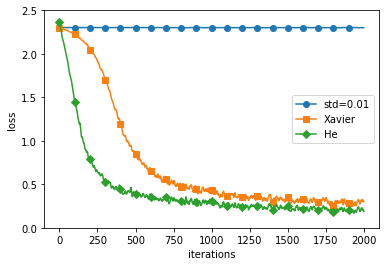

In [32]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 배치 정규화 테스트

In [9]:
x1 = np.array([1000, 3000, 2000, 5000, 7000])
print(x1)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(out)

[1000 3000 2000 5000 7000]
[-1.2070197  -0.27854301 -0.74278135  0.64993368  1.57841037]


In [10]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))

-3.637978807091713e-17
0.9999999999999999


In [11]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))
gamma = 2
beta = 1
y = out*gamma + beta
print(np.mean(y))
print(np.std(y))

-3.637978807091713e-17
0.9999999999999999
1.0
1.9999999999999998


In [33]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05045375541983255
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [13]:
a = np.logspace(0, -4, num=5, base=2)
a

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [36]:
a = np.logspace(0, 4, num=5, base=2)
a

array([ 1.,  2.,  4.,  8., 16.])

In [38]:
a = np.logspace(0, -4, num=5, base=10)
a

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])

In [43]:
a = np.logspace(0, -4, num=16, base=10)
a

array([1.00000000e+00, 5.41169527e-01, 2.92864456e-01, 1.58489319e-01,
       8.57695899e-02, 4.64158883e-02, 2.51188643e-02, 1.35935639e-02,
       7.35642254e-03, 3.98107171e-03, 2.15443469e-03, 1.16591440e-03,
       6.30957344e-04, 3.41454887e-04, 1.84784980e-04, 1.00000000e-04])

============== 1/16 ==============
epoch:0 | 0.105 - 0.099
epoch:1 | 0.116 - 0.072
epoch:2 | 0.116 - 0.097
epoch:3 | 0.116 - 0.121
epoch:4 | 0.116 - 0.135
epoch:5 | 0.116 - 0.148
epoch:6 | 0.116 - 0.175
epoch:7 | 0.116 - 0.194
epoch:8 | 0.116 - 0.221
epoch:9 | 0.116 - 0.239
epoch:10 | 0.116 - 0.264
epoch:11 | 0.116 - 0.266
epoch:12 | 0.116 - 0.293
epoch:13 | 0.116 - 0.299
epoch:14 | 0.116 - 0.332
epoch:15 | 0.116 - 0.345
epoch:16 | 0.116 - 0.359
epoch:17 | 0.116 - 0.38
epoch:18 | 0.116 - 0.39


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.403
============== 2/16 ==============
epoch:0 | 0.093 - 0.091
epoch:1 | 0.097 - 0.08


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.087
epoch:3 | 0.097 - 0.104
epoch:4 | 0.097 - 0.118
epoch:5 | 0.097 - 0.131
epoch:6 | 0.097 - 0.156
epoch:7 | 0.097 - 0.184
epoch:8 | 0.097 - 0.216
epoch:9 | 0.097 - 0.245
epoch:10 | 0.097 - 0.263
epoch:11 | 0.097 - 0.29
epoch:12 | 0.097 - 0.302
epoch:13 | 0.097 - 0.325
epoch:14 | 0.097 - 0.346
epoch:15 | 0.097 - 0.361
epoch:16 | 0.097 - 0.374
epoch:17 | 0.097 - 0.394


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.402
epoch:19 | 0.097 - 0.423
============== 3/16 ==============
epoch:0 | 0.086 - 0.115
epoch:1 | 0.306 - 0.13
epoch:2 | 0.49 - 0.164
epoch:3 | 0.603 - 0.203
epoch:4 | 0.671 - 0.23
epoch:5 | 0.717 - 0.275
epoch:6 | 0.766 - 0.316
epoch:7 | 0.805 - 0.341
epoch:8 | 0.835 - 0.387
epoch:9 | 0.866 - 0.421
epoch:10 | 0.889 - 0.444
epoch:11 | 0.908 - 0.475
epoch:12 | 0.918 - 0.494
epoch:13 | 0.93 - 0.525
epoch:14 | 0.937 - 0.538
epoch:15 | 0.95 - 0.561
epoch:16 | 0.961 - 0.584
epoch:17 | 0.963 - 0.606
epoch:18 | 0.965 - 0.613


No handles with labels found to put in legend.


epoch:19 | 0.97 - 0.632
============== 4/16 ==============
epoch:0 | 0.099 - 0.086
epoch:1 | 0.192 - 0.087
epoch:2 | 0.342 - 0.127
epoch:3 | 0.473 - 0.217
epoch:4 | 0.543 - 0.312
epoch:5 | 0.59 - 0.392
epoch:6 | 0.658 - 0.461
epoch:7 | 0.686 - 0.52
epoch:8 | 0.72 - 0.555
epoch:9 | 0.738 - 0.585
epoch:10 | 0.76 - 0.62
epoch:11 | 0.782 - 0.657
epoch:12 | 0.79 - 0.675
epoch:13 | 0.814 - 0.687
epoch:14 | 0.82 - 0.703
epoch:15 | 0.832 - 0.719
epoch:16 | 0.853 - 0.737
epoch:17 | 0.859 - 0.749
epoch:18 | 0.864 - 0.76


No handles with labels found to put in legend.


epoch:19 | 0.87 - 0.776
============== 5/16 ==============
epoch:0 | 0.096 - 0.067
epoch:1 | 0.106 - 0.171
epoch:2 | 0.117 - 0.3
epoch:3 | 0.126 - 0.414
epoch:4 | 0.13 - 0.492
epoch:5 | 0.142 - 0.556
epoch:6 | 0.151 - 0.594
epoch:7 | 0.161 - 0.65
epoch:8 | 0.17 - 0.691
epoch:9 | 0.177 - 0.726
epoch:10 | 0.186 - 0.753
epoch:11 | 0.194 - 0.789
epoch:12 | 0.197 - 0.808
epoch:13 | 0.204 - 0.826
epoch:14 | 0.212 - 0.834
epoch:15 | 0.213 - 0.84
epoch:16 | 0.218 - 0.849
epoch:17 | 0.225 - 0.859


No handles with labels found to put in legend.


epoch:18 | 0.255 - 0.869
epoch:19 | 0.277 - 0.876
============== 6/16 ==============
epoch:0 | 0.084 - 0.063
epoch:1 | 0.123 - 0.193
epoch:2 | 0.117 - 0.422
epoch:3 | 0.117 - 0.556
epoch:4 | 0.117 - 0.651
epoch:5 | 0.117 - 0.721
epoch:6 | 0.117 - 0.76
epoch:7 | 0.117 - 0.792
epoch:8 | 0.117 - 0.826
epoch:9 | 0.117 - 0.838
epoch:10 | 0.117 - 0.853
epoch:11 | 0.117 - 0.865
epoch:12 | 0.117 - 0.879
epoch:13 | 0.117 - 0.884
epoch:14 | 0.117 - 0.892
epoch:15 | 0.117 - 0.902
epoch:16 | 0.117 - 0.914
epoch:17 | 0.117 - 0.926


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.936
epoch:19 | 0.117 - 0.944
============== 7/16 ==============
epoch:0 | 0.117 - 0.125
epoch:1 | 0.117 - 0.208
epoch:2 | 0.117 - 0.568
epoch:3 | 0.117 - 0.715
epoch:4 | 0.117 - 0.777
epoch:5 | 0.117 - 0.798
epoch:6 | 0.117 - 0.841
epoch:7 | 0.117 - 0.855
epoch:8 | 0.117 - 0.881
epoch:9 | 0.117 - 0.909
epoch:10 | 0.117 - 0.926
epoch:11 | 0.117 - 0.94
epoch:12 | 0.117 - 0.952
epoch:13 | 0.117 - 0.957
epoch:14 | 0.117 - 0.965
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.975
epoch:17 | 0.117 - 0.981
epoch:18 | 0.117 - 0.982
epoch:19 | 0.117 - 0.987


No handles with labels found to put in legend.


============== 8/16 ==============
epoch:0 | 0.099 - 0.086
epoch:1 | 0.117 - 0.405
epoch:2 | 0.117 - 0.603
epoch:3 | 0.117 - 0.74
epoch:4 | 0.117 - 0.812
epoch:5 | 0.117 - 0.857
epoch:6 | 0.117 - 0.906
epoch:7 | 0.117 - 0.941
epoch:8 | 0.117 - 0.96
epoch:9 | 0.117 - 0.972
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.991
epoch:12 | 0.117 - 0.994
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.117 - 0.122
epoch:1 | 0.116 - 0.42
epoch:2 | 0.116 - 0.676
epoch:3 | 0.116 - 0.748
epoch:4 | 0.116 - 0.819
epoch:5 | 0.116 - 0.883
epoch:6 | 0.117 - 0.901
epoch:7 | 0.117 - 0.931
epoch:8 | 0.117 - 0.964
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.994
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.169
epoch:1 | 0.094 - 0.401
epoch:2 | 0.105 - 0.483
epoch:3 | 0.105 - 0.6
epoch:4 | 0.116 - 0.722
epoch:5 | 0.117 - 0.736
epoch:6 | 0.117 - 0.863
epoch:7 | 0.117 - 0.876
epoch:8 | 0.116 - 0.889
epoch:9 | 0.117 - 0.942
epoch:10 | 0.117 - 0.977
epoch:11 | 0.117 - 0.971
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.985
epoch:14 | 0.117 - 0.904
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.992
epoch:17 | 0.117 - 0.969


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.997
epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:0 | 0.094 - 0.219
epoch:1 | 0.117 - 0.549
epoch:2 | 0.117 - 0.658
epoch:3 | 0.117 - 0.644
epoch:4 | 0.117 - 0.707
epoch:5 | 0.117 - 0.735
epoch:6 | 0.117 - 0.78
epoch:7 | 0.117 - 0.789
epoch:8 | 0.117 - 0.788
epoch:9 | 0.117 - 0.794
epoch:10 | 0.117 - 0.785
epoch:11 | 0.117 - 0.791
epoch:12 | 0.117 - 0.798
epoch:13 | 0.117 - 0.8
epoch:14 | 0.117 - 0.801
epoch:15 | 0.117 - 0.799
epoch:16 | 0.117 - 0.8
epoch:17 | 0.117 - 0.801


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.801
epoch:19 | 0.117 - 0.801
============== 12/16 ==============
epoch:0 | 0.099 - 0.163
epoch:1 | 0.117 - 0.298
epoch:2 | 0.117 - 0.569
epoch:3 | 0.117 - 0.564
epoch:4 | 0.117 - 0.673
epoch:5 | 0.117 - 0.617
epoch:6 | 0.117 - 0.639
epoch:7 | 0.117 - 0.747
epoch:8 | 0.117 - 0.703
epoch:9 | 0.117 - 0.758
epoch:10 | 0.117 - 0.778
epoch:11 | 0.117 - 0.792
epoch:12 | 0.117 - 0.736
epoch:13 | 0.117 - 0.736
epoch:14 | 0.117 - 0.709
epoch:15 | 0.117 - 0.712
epoch:16 | 0.117 - 0.719
epoch:17 | 0.117 - 0.798
epoch:18 | 0.117 - 0.811


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.806
============== 13/16 ==============
epoch:0 | 0.117 - 0.207
epoch:1 | 0.116 - 0.512
epoch:2 | 0.116 - 0.596
epoch:3 | 0.116 - 0.587
epoch:4 | 0.116 - 0.679
epoch:5 | 0.116 - 0.418
epoch:6 | 0.116 - 0.669
epoch:7 | 0.116 - 0.682
epoch:8 | 0.116 - 0.697
epoch:9 | 0.116 - 0.767
epoch:10 | 0.116 - 0.761
epoch:11 | 0.116 - 0.787
epoch:12 | 0.117 - 0.786
epoch:13 | 0.117 - 0.776
epoch:14 | 0.117 - 0.774
epoch:15 | 0.117 - 0.787
epoch:16 | 0.117 - 0.802
epoch:17 | 0.116 - 0.765


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.826
epoch:19 | 0.116 - 0.802
============== 14/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.116 - 0.38
epoch:2 | 0.116 - 0.443
epoch:3 | 0.116 - 0.447
epoch:4 | 0.116 - 0.592
epoch:5 | 0.116 - 0.58
epoch:6 | 0.116 - 0.609
epoch:7 | 0.116 - 0.603
epoch:8 | 0.116 - 0.602
epoch:9 | 0.116 - 0.645
epoch:10 | 0.116 - 0.649
epoch:11 | 0.117 - 0.668
epoch:12 | 0.117 - 0.688
epoch:13 | 0.117 - 0.69
epoch:14 | 0.117 - 0.696
epoch:15 | 0.117 - 0.714
epoch:16 | 0.117 - 0.653
epoch:17 | 0.117 - 0.635
epoch:18 | 0.117 - 0.625


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.693
============== 15/16 ==============
epoch:0 | 0.116 - 0.127
epoch:1 | 0.116 - 0.352
epoch:2 | 0.116 - 0.419
epoch:3 | 0.116 - 0.455
epoch:4 | 0.116 - 0.416
epoch:5 | 0.117 - 0.486
epoch:6 | 0.116 - 0.5
epoch:7 | 0.116 - 0.472
epoch:8 | 0.117 - 0.493
epoch:9 | 0.117 - 0.504
epoch:10 | 0.117 - 0.5
epoch:11 | 0.117 - 0.507
epoch:12 | 0.117 - 0.594
epoch:13 | 0.117 - 0.593
epoch:14 | 0.117 - 0.597
epoch:15 | 0.117 - 0.597
epoch:16 | 0.117 - 0.589
epoch:17 | 0.117 - 0.597


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.6
epoch:19 | 0.117 - 0.602
============== 16/16 ==============
epoch:0 | 0.097 - 0.101
epoch:1 | 0.105 - 0.188
epoch:2 | 0.117 - 0.309
epoch:3 | 0.105 - 0.4
epoch:4 | 0.116 - 0.32
epoch:5 | 0.116 - 0.41
epoch:6 | 0.116 - 0.4
epoch:7 | 0.116 - 0.4
epoch:8 | 0.117 - 0.428
epoch:9 | 0.117 - 0.418
epoch:10 | 0.117 - 0.414
epoch:11 | 0.117 - 0.411
epoch:12 | 0.117 - 0.433
epoch:13 | 0.117 - 0.402
epoch:14 | 0.117 - 0.346
epoch:15 | 0.117 - 0.337
epoch:16 | 0.117 - 0.435
epoch:17 | 0.117 - 0.424
epoch:18 | 0.117 - 0.435
epoch:19 | 0.117 - 0.416


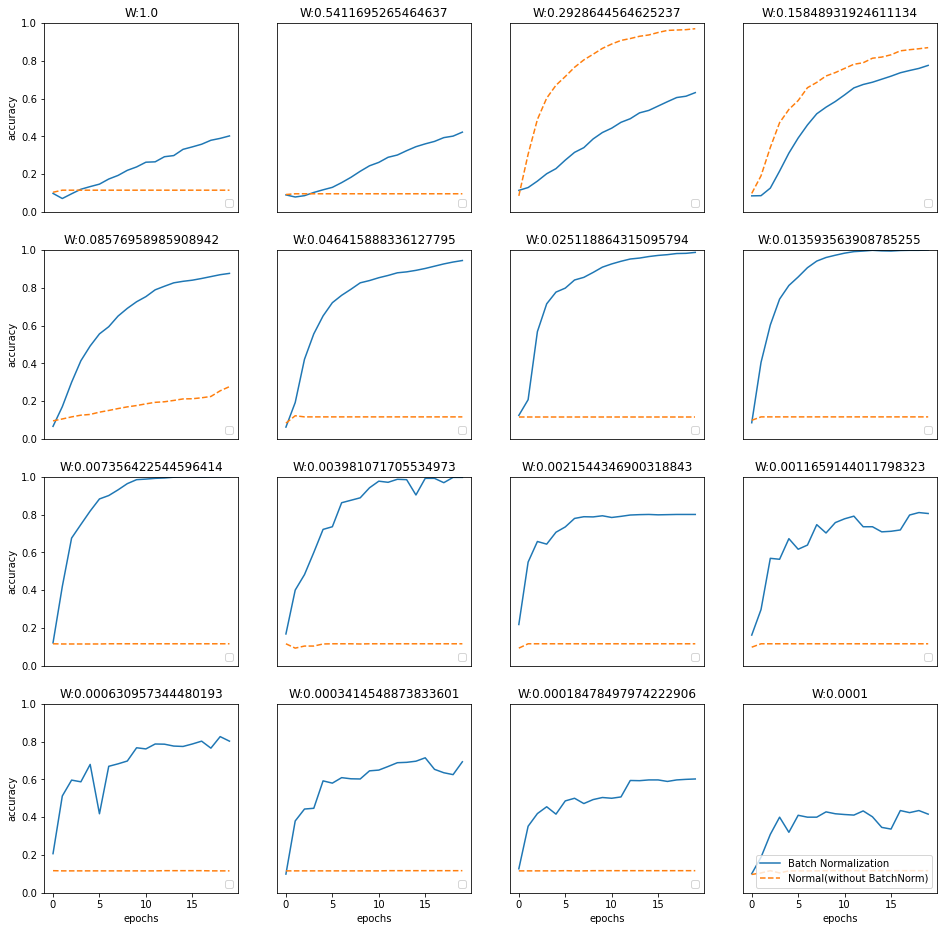

In [34]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.14, test acc:0.1043
epoch:1, train acc:0.17, test acc:0.125
epoch:2, train acc:0.19333333333333333, test acc:0.1403
epoch:3, train acc:0.21666666666666667, test acc:0.147
epoch:4, train acc:0.25333333333333335, test acc:0.1592
epoch:5, train acc:0.26666666666666666, test acc:0.1762
epoch:6, train acc:0.2966666666666667, test acc:0.1876
epoch:7, train acc:0.32, test acc:0.2048
epoch:8, train acc:0.32666666666666666, test acc:0.2146
epoch:9, train acc:0.35, test acc:0.2312
epoch:10, train acc:0.36666666666666664, test acc:0.2403
epoch:11, train acc:0.37666666666666665, test acc:0.2489
epoch:12, train acc:0.41, test acc:0.2714
epoch:13, train acc:0.45, test acc:0.3005
epoch:14, train acc:0.4766666666666667, test acc:0.3178
epoch:15, train acc:0.4766666666666667, test acc:0.3305
epoch:16, train acc:0.49, test acc:0.3387
epoch:17, train acc:0.49333333333333335, test acc:0.3496
epoch:18, train acc:0.51, test acc:0.3542
epoch:19, train acc:0.5433333333333333, test acc:0.3

epoch:162, train acc:0.9133333333333333, test acc:0.6938
epoch:163, train acc:0.9033333333333333, test acc:0.6993
epoch:164, train acc:0.9066666666666666, test acc:0.7064
epoch:165, train acc:0.91, test acc:0.7047
epoch:166, train acc:0.9033333333333333, test acc:0.7013
epoch:167, train acc:0.9066666666666666, test acc:0.7056
epoch:168, train acc:0.9, test acc:0.7072
epoch:169, train acc:0.9, test acc:0.7072
epoch:170, train acc:0.8966666666666666, test acc:0.7061
epoch:171, train acc:0.91, test acc:0.7053
epoch:172, train acc:0.8933333333333333, test acc:0.6999
epoch:173, train acc:0.9133333333333333, test acc:0.7011
epoch:174, train acc:0.9, test acc:0.7011
epoch:175, train acc:0.9066666666666666, test acc:0.7044
epoch:176, train acc:0.9, test acc:0.7016
epoch:177, train acc:0.9066666666666666, test acc:0.7042
epoch:178, train acc:0.9166666666666666, test acc:0.7044
epoch:179, train acc:0.9033333333333333, test acc:0.7046
epoch:180, train acc:0.92, test acc:0.7023
epoch:181, train ac

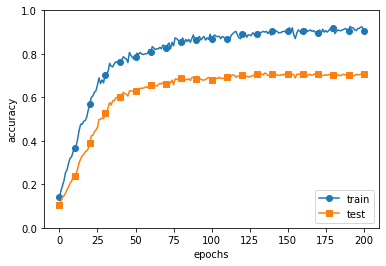

In [45]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

In [58]:
import numpy as np
x = (600,500)
# x = (6,5)
# a,b = x
# print(a,b)
# print(x)
# print(*x)
a = np.random.rand(*x)  # np.random.rand( (6,5) ) =>  np.random.rand( 6, 5 ) 
# print(a)
print(np.mean(a))
print(np.max(a))
print(np.min(a))

0.4992198784640629
0.9999996382422313
3.617758679297367e-07


In [74]:
import numpy as np
x = np.arange(10,40).reshape((6,5))
print(x)
print(x.shape)
mask = np.random.rand(*x.shape)
print(mask)
mask = mask > 0.2
print(mask)
print(mask.shape)
print(np.mean(mask))
# # print(x * mask)
x *= mask
print(x)

[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]]
(6, 5)
[[0.68656415 0.93720792 0.91084664 0.48896056 0.7065518 ]
 [0.97863615 0.74224634 0.26904135 0.18910957 0.62751781]
 [0.93331584 0.78902737 0.51758081 0.58664463 0.26239635]
 [0.1382819  0.57831963 0.35957228 0.63310601 0.01256747]
 [0.11975236 0.87524341 0.33151122 0.22800243 0.83112204]
 [0.22346016 0.36262609 0.02664497 0.39346972 0.05367561]]
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [False  True  True  True  True]
 [ True  True False  True False]]
(6, 5)
0.8
[[10 11 12 13 14]
 [15 16 17  0 19]
 [20 21 22 23 24]
 [ 0 26 27 28  0]
 [ 0 31 32 33 34]
 [35 36  0 38  0]]


train loss:2.3081384407454033
=== epoch:1, train acc:0.11666666666666667, test acc:0.0829 ===
train loss:2.2913998437610985
train loss:2.3017741179127844
train loss:2.298703754099381
=== epoch:2, train acc:0.11666666666666667, test acc:0.0865 ===
train loss:2.298639520480111
train loss:2.285657446864596
train loss:2.300103729913343
=== epoch:3, train acc:0.12333333333333334, test acc:0.0881 ===
train loss:2.2798229889040043
train loss:2.3208821070923245
train loss:2.3163956579219347
=== epoch:4, train acc:0.12333333333333334, test acc:0.0917 ===
train loss:2.306105366566899
train loss:2.3074281793812883
train loss:2.3134423868823473
=== epoch:5, train acc:0.12, test acc:0.0912 ===
train loss:2.301557316234079
train loss:2.3059811776518853
train loss:2.3083665723942306
=== epoch:6, train acc:0.12333333333333334, test acc:0.095 ===
train loss:2.282091680398279
train loss:2.2989395240497523
train loss:2.3046886392823973
=== epoch:7, train acc:0.12666666666666668, test acc:0.0965 ===
train

=== epoch:57, train acc:0.15333333333333332, test acc:0.1298 ===
train loss:2.2573333124925172
train loss:2.2381485011488507
train loss:2.228260842833045
=== epoch:58, train acc:0.16, test acc:0.1329 ===
train loss:2.245827960496274
train loss:2.2265221748335766
train loss:2.224472615841599
=== epoch:59, train acc:0.16666666666666666, test acc:0.1352 ===
train loss:2.217856488675442
train loss:2.2237815730906836
train loss:2.215132854046213
=== epoch:60, train acc:0.16333333333333333, test acc:0.1333 ===
train loss:2.2175008452002736
train loss:2.2079508122563927
train loss:2.2444366136423515
=== epoch:61, train acc:0.17333333333333334, test acc:0.1385 ===
train loss:2.23332234826077
train loss:2.2434743081804194
train loss:2.2375173119083867
=== epoch:62, train acc:0.17333333333333334, test acc:0.1425 ===
train loss:2.2356276314165435
train loss:2.2258012929457567
train loss:2.226607646872777
=== epoch:63, train acc:0.18666666666666668, test acc:0.1498 ===
train loss:2.243582573959837

=== epoch:112, train acc:0.2733333333333333, test acc:0.2327 ===
train loss:2.130884493629276
train loss:2.154180855465626
train loss:2.081419565985951
=== epoch:113, train acc:0.2733333333333333, test acc:0.2345 ===
train loss:2.1206558881348694
train loss:2.1174894492747582
train loss:2.166225548036042
=== epoch:114, train acc:0.2733333333333333, test acc:0.2375 ===
train loss:2.1473012316412046
train loss:2.0771953076584153
train loss:2.197235634262218
=== epoch:115, train acc:0.27666666666666667, test acc:0.2403 ===
train loss:2.183128013751913
train loss:2.1061483571308295
train loss:2.0415310348326976
=== epoch:116, train acc:0.2833333333333333, test acc:0.2418 ===
train loss:2.104146975259543
train loss:2.115419527738828
train loss:2.1284757356265125
=== epoch:117, train acc:0.2866666666666667, test acc:0.2404 ===
train loss:2.1884896364594657
train loss:2.107793304364202
train loss:2.1053414384381357
=== epoch:118, train acc:0.2866666666666667, test acc:0.2415 ===
train loss:2.

=== epoch:167, train acc:0.4266666666666667, test acc:0.3192 ===
train loss:1.9638873755123194
train loss:2.0078629590245636
train loss:1.9985308760837646
=== epoch:168, train acc:0.43, test acc:0.323 ===
train loss:1.9560103678251282
train loss:1.9780124266536543
train loss:1.9629538371318924
=== epoch:169, train acc:0.43666666666666665, test acc:0.3224 ===
train loss:1.9008337556328139
train loss:1.9853214233739502
train loss:1.9503767930114273
=== epoch:170, train acc:0.4266666666666667, test acc:0.3212 ===
train loss:2.0095883505615872
train loss:1.9522324067931478
train loss:1.9595345901669479
=== epoch:171, train acc:0.43666666666666665, test acc:0.3256 ===
train loss:2.0560471930851
train loss:1.9116375390373868
train loss:1.9817628538065621
=== epoch:172, train acc:0.44666666666666666, test acc:0.3298 ===
train loss:2.047518381306533
train loss:1.9601746868897427
train loss:1.9856052819408527
=== epoch:173, train acc:0.44333333333333336, test acc:0.3316 ===
train loss:1.9614670

=== epoch:222, train acc:0.5266666666666666, test acc:0.4034 ===
train loss:1.7516270506984009
train loss:1.6993842499024716
train loss:1.8097441870258963
=== epoch:223, train acc:0.52, test acc:0.4035 ===
train loss:1.8016601675011625
train loss:1.7575122679032609
train loss:1.814034406672873
=== epoch:224, train acc:0.52, test acc:0.4035 ===
train loss:1.8537430299554407
train loss:1.7995555733505757
train loss:1.8261744669874225
=== epoch:225, train acc:0.53, test acc:0.4031 ===
train loss:1.8928185792805314
train loss:1.82816095017562
train loss:1.6761155160316792
=== epoch:226, train acc:0.53, test acc:0.4048 ===
train loss:1.7579098355022977
train loss:1.7042255009927865
train loss:1.7637074138283146
=== epoch:227, train acc:0.53, test acc:0.4063 ===
train loss:1.7583740562036747
train loss:1.8009898922282417
train loss:1.70373389043987
=== epoch:228, train acc:0.5233333333333333, test acc:0.4069 ===
train loss:1.783875326147384
train loss:1.7966660593106436
train loss:1.90962465

=== epoch:278, train acc:0.5833333333333334, test acc:0.4804 ===
train loss:1.4989729037838464
train loss:1.4668240508889405
train loss:1.5284019219552576
=== epoch:279, train acc:0.5866666666666667, test acc:0.481 ===
train loss:1.5468305140166054
train loss:1.5654141071464727
train loss:1.5092070694270956
=== epoch:280, train acc:0.5833333333333334, test acc:0.4842 ===
train loss:1.586549858187596
train loss:1.5470347746505546
train loss:1.5483650817925425
=== epoch:281, train acc:0.59, test acc:0.4848 ===
train loss:1.4841564647755876
train loss:1.5861814782498096
train loss:1.4579237487662835
=== epoch:282, train acc:0.58, test acc:0.4841 ===
train loss:1.4899119753683843
train loss:1.5800837629349413
train loss:1.5151996820984452
=== epoch:283, train acc:0.5833333333333334, test acc:0.4834 ===
train loss:1.534093257080205
train loss:1.6122288550584987
train loss:1.4037972950209427
=== epoch:284, train acc:0.5933333333333334, test acc:0.4881 ===
train loss:1.645296433520193
train l

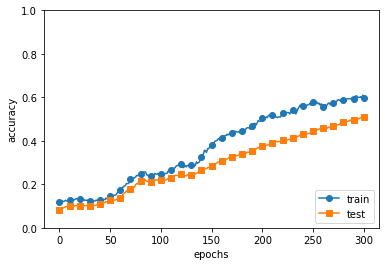

In [48]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [47]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.1 | lr:2.493632026477904e-06, weight decay:6.565083484929602e-08
val acc:0.59 | lr:0.004520164428238018, weight decay:1.2512400802237947e-06
val acc:0.12 | lr:8.154509154458127e-05, weight decay:8.417000586783028e-07
val acc:0.24 | lr:0.0007904110694956972, weight decay:1.9971286271750546e-05
val acc:0.11 | lr:2.4884767181721028e-05, weight decay:8.146795432911641e-07
val acc:0.59 | lr:0.006226324191695328, weight decay:1.9097722388657896e-08
val acc:0.11 | lr:6.797464136604817e-05, weight decay:7.420822486823743e-07
val acc:0.06 | lr:2.0864518231045474e-05, weight decay:1.9803989585827785e-05
val acc:0.26 | lr:0.0022863755494415446, weight decay:3.943952214152173e-05
val acc:0.08 | lr:0.00012461345137374197, weight decay:3.08668203742715e-07
val acc:0.09 | lr:0.0003775697757248839, weight decay:2.1517822719341558e-05
val acc:0.67 | lr:0.006059040245399343, weight decay:4.852383831078038e-07
val acc:0.12 | lr:6.199510721628802e-05, weight decay:1.016181757166911e-07
val acc:0

KeyboardInterrupt: 